In [125]:
# import data using read_csv
import pandas as pd
bike_data = pd.read_csv("BikeShare.csv",encoding='latin1', index_col = False )
bike_data

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01.01.2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,02.01.2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,03.01.2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,04.01.2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,05.01.2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,27.12.2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,2114
727,728,28.12.2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,3095
728,729,29.12.2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,1341
729,730,30.12.2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,1796


In [126]:
# locate the dependent variable (Y)
Y = bike_data.iloc[:,13]
Y

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 731, dtype: int64

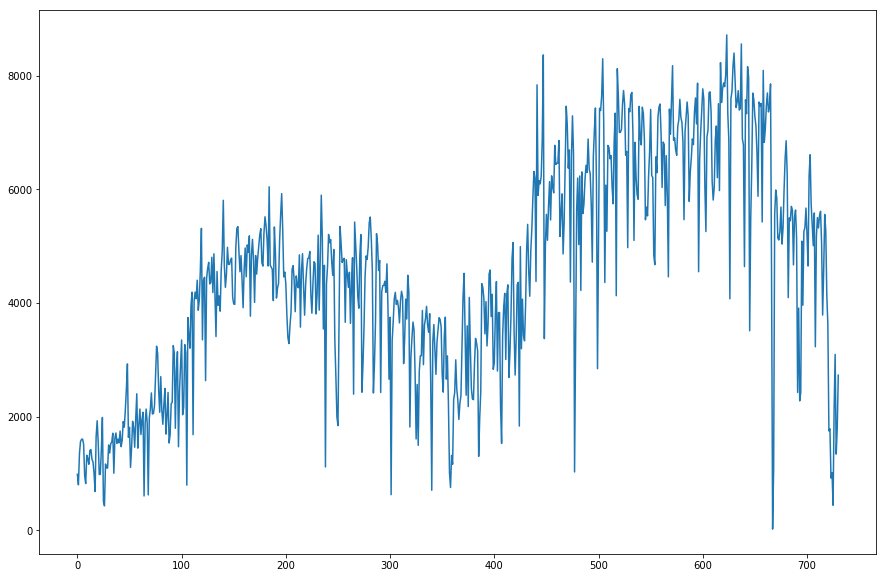

In [127]:
# plot Y
import matplotlib.pyplot as plt
# determine the size of plot
fig, ax = plt.subplots(figsize=(15, 10))
# plot the graph
plt.plot(Y)
# show the graph
plt.show()

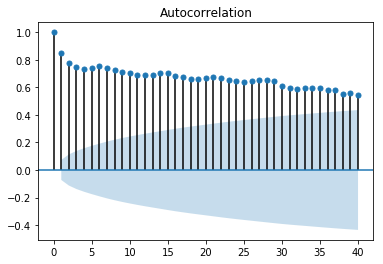

In [128]:
# plot autocorrelation
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(Y, lags=40)
plt.show()

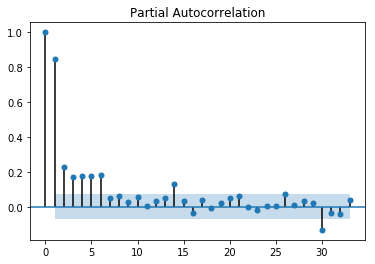

In [129]:
# plot partial autocorrelation
sm.graphics.tsa.plot_pacf(Y, lags=33)
plt.show()

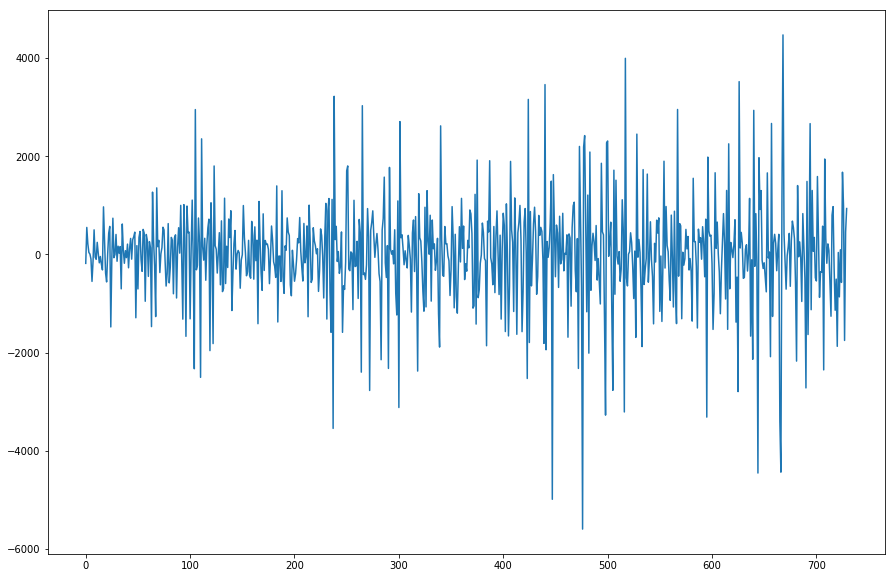

In [130]:
# take the first difference
diff_Y = list() # create an empty list
for i in range(1, len(Y)): # from index 1 to index len(Y) = 731
    value_Y = Y[i] - Y[i - 1] # take the difference btw each consecutive element in list
    diff_Y.append(value_Y) # append to new list
    
# plot diff_Y 
fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(diff_Y)
plt.show()

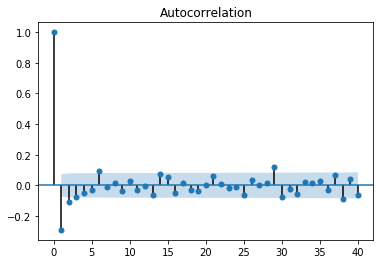

In [131]:
# plot autocorrelation function 
sm.graphics.tsa.plot_acf(diff_Y, lags=40)
plt.show()

In [132]:
# separate Y into train and test data
train = 500

In [133]:
# construct Y_train
Y_train = Y[:train] # of size 500

In [134]:
# construct Y_test
Y_test = Y[train:] # of size 231
Y_train

0       985
1       801
2      1349
3      1562
4      1600
       ... 
495    6572
496    7030
497    7429
498    6118
499    2843
Name: cnt, Length: 500, dtype: int64

In [135]:
# locate independent variables (X)
X = bike_data.iloc[:,[10,11,12]] # take columns 11,12,13
X

,atemp,hum,windspeed
0,0.363625,0.805833,0.160446
1,0.353739,0.696087,0.248539
2,0.189405,0.437273,0.248309
3,0.212122,0.590435,0.160296
4,0.229270,0.436957,0.186900
...,...,...,...
726,0.226642,0.652917,0.350133
727,0.255046,0.590000,0.155471
728,0.242400,0.752917,0.124383
729,0.231700,0.483333,0.350754


In [136]:
# add constant to linear regression model (required for OLS regression)
X = sm.add_constant(X)

/Users/korayyenal/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [137]:
# separate X into train and test data
X_train = X[:train] # of size 500

In [138]:
X_test = X[train:] # of size 231
X_test

,const,atemp,hum,windspeed
500,1.0,0.576404,0.794583,0.147392
501,1.0,0.595975,0.697917,0.122512
502,1.0,0.572613,0.520000,0.229475
503,1.0,0.551121,0.523333,0.136817
504,1.0,0.566908,0.456250,0.083975
...,...,...,...,...
726,1.0,0.226642,0.652917,0.350133
727,1.0,0.255046,0.590000,0.155471
728,1.0,0.242400,0.752917,0.124383
729,1.0,0.231700,0.483333,0.350754


In [139]:
# fit a model using X_train and Y_train
model = sm.OLS(Y_train, X_train).fit()

In [140]:
# predict X_test with the fitted model
y_pred = model.predict(X_test)

In [141]:
# print summary statistics
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     144.2
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           3.48e-67
Time:                        17:17:25   Log-Likelihood:                -4221.7
No. Observations:                 500   AIC:                             8451.
Df Residuals:                     496   BIC:                             8468.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3184.9319    312.394     10.195      0.0

In [142]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

# Report MSE
print("MSE: ", round(mean_squared_error(Y_test, y_pred),2))
# Report RMSE
print("RMSE: ", round(np.sqrt(mean_squared_error(Y_test, y_pred)),2))
# Report MAD
MAD = np.mean(abs(Y_test - y_pred))
print("MAD: ", round(MAD,2))

MSE:  4866023.86
RMSE:  2205.91
MAD:  1990.03


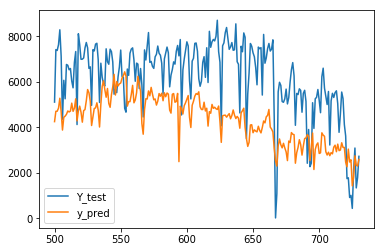

In [143]:
# plot predicted Y (y_pred) and observed Y (Y_test)
plt.plot(Y_test, zorder=1, label = "Y_test")
plt.plot(y_pred , zorder=2, label = "y_pred")
plt.legend(loc="lower left")
plt.show()

In [144]:
# Part 2 - bike_expanded.csv

# import data using read_csv
bike_data_exp = pd.read_csv("BikeShare_expanded.csv",encoding='latin1', index_col = False )
bike_data_exp

,instant,dateday,season,year,month,holiday,weekday,workingday,weathersit,normalized_t,Wday,W1,W2,W3,temp,atemp,hum,windspeed,cnt
0,1,1.01.2011,1,0,1,0,6,0,2,0.0014,0,0,1,0,0.344167,0.363625,0.805833,0.160446,985
1,2,2.01.2011,1,0,1,0,0,0,2,0.0027,0,0,1,0,0.363478,0.353739,0.696087,0.248539,801
2,3,3.01.2011,1,0,1,0,1,1,1,0.0041,1,1,0,0,0.196364,0.189405,0.437273,0.248309,1349
3,4,4.01.2011,1,0,1,0,2,1,1,0.0055,1,1,0,0,0.200000,0.212122,0.590435,0.160296,1562
4,5,5.01.2011,1,0,1,0,3,1,1,0.0068,1,1,0,0,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,27.12.2012,1,1,12,0,4,1,2,0.9945,1,0,1,0,0.254167,0.226642,0.652917,0.350133,2114
727,728,28.12.2012,1,1,12,0,5,1,2,0.9959,1,0,1,0,0.253333,0.255046,0.590000,0.155471,3095
728,729,29.12.2012,1,1,12,0,6,0,2,0.9973,0,0,1,0,0.253333,0.242400,0.752917,0.124383,1341
729,730,30.12.2012,1,1,12,0,0,0,1,0.9986,0,1,0,0,0.255833,0.231700,0.483333,0.350754,1796


In [145]:
# this time, the dependent variable is at column 19. Since the indexing in Python starts with 0, we need to call index 18.
Y2 = bike_data_exp.iloc[:,18]
Y2

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 731, dtype: int64

In [146]:
# we'll take the last 9 columns of BikeShare_expanded.csv, and the constant.
X2 = bike_data_exp.iloc[:,9:18]
X2 = sm.add_constant(X2)
X2

/Users/korayyenal/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,normalized_t,Wday,W1,W2,W3,temp,atemp,hum,windspeed
0,1.0,0.0014,0,0,1,0,0.344167,0.363625,0.805833,0.160446
1,1.0,0.0027,0,0,1,0,0.363478,0.353739,0.696087,0.248539
2,1.0,0.0041,1,1,0,0,0.196364,0.189405,0.437273,0.248309
3,1.0,0.0055,1,1,0,0,0.200000,0.212122,0.590435,0.160296
4,1.0,0.0068,1,1,0,0,0.226957,0.229270,0.436957,0.186900
...,...,...,...,...,...,...,...,...,...,...
726,1.0,0.9945,1,0,1,0,0.254167,0.226642,0.652917,0.350133
727,1.0,0.9959,1,0,1,0,0.253333,0.255046,0.590000,0.155471
728,1.0,0.9973,0,0,1,0,0.253333,0.242400,0.752917,0.124383
729,1.0,0.9986,0,1,0,0,0.255833,0.231700,0.483333,0.350754


In [148]:
# separate Y2 into train and test data
train = 500
Y2_train = Y2[:train] # of size 500
Y2_test = Y2[train:] # of size 231
Y2_test

500    5115
501    7424
502    7384
503    7639
504    8294
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 231, dtype: int64

In [149]:
# separate X2 into train and test data
X2_train = X2[:train] # of size 500
X2_test = X2[train:] # of size 231
X2_test

,const,normalized_t,Wday,W1,W2,W3,temp,atemp,hum,windspeed
500,1.0,0.6854,1,0,1,0,0.611667,0.576404,0.794583,0.147392
501,1.0,0.6867,1,1,0,0,0.636667,0.595975,0.697917,0.122512
502,1.0,0.6881,1,1,0,0,0.593333,0.572613,0.520000,0.229475
503,1.0,0.6895,1,1,0,0,0.564167,0.551121,0.523333,0.136817
504,1.0,0.6908,0,1,0,0,0.600000,0.566908,0.456250,0.083975
...,...,...,...,...,...,...,...,...,...,...
726,1.0,0.9945,1,0,1,0,0.254167,0.226642,0.652917,0.350133
727,1.0,0.9959,1,0,1,0,0.253333,0.255046,0.590000,0.155471
728,1.0,0.9973,0,0,1,0,0.253333,0.242400,0.752917,0.124383
729,1.0,0.9986,0,1,0,0,0.255833,0.231700,0.483333,0.350754


In [150]:
# fit a model using X2_train and Y2_train
model2 = sm.OLS(Y2_train, X2_train).fit()

In [151]:
# predict X_test with the fitted model
y2_pred = model2.predict(X2_test)

In [152]:
print_model2 = model2.summary()
print(print_model2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     173.9
Date:                Wed, 14 Apr 2021   Prob (F-statistic):          5.76e-138
Time:                        17:17:27   Log-Likelihood:                -4042.6
No. Observations:                 500   AIC:                             8103.
Df Residuals:                     491   BIC:                             8141.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          426.7049    231.792      1.841   

In [153]:
# Report MSE
print("MSE: ", round(mean_squared_error(Y2_test, y2_pred),2))
# Report RMSE
print("RMSE: ", round(np.sqrt(mean_squared_error(Y2_test, y2_pred)),2))
# Report MAD
MAD2 = np.mean(abs(Y2_test - y2_pred))
print("MAD2: ", round(MAD2,2))

MSE:  1581810.02
RMSE:  1257.7
MAD2:  925.34


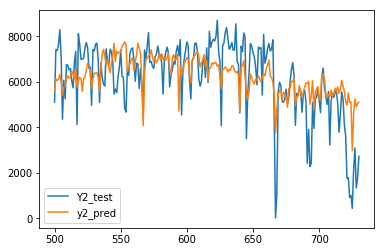

In [154]:
# plot predicted Y (y_pred) and observed Y (Y_test)
plt.plot(Y2_test, zorder=1, label = "Y2_test")
plt.plot(y2_pred , zorder=2, label = "y2_pred")
plt.legend(loc="lower left")
plt.show()

In [155]:
from sklearn.linear_model import Lasso

#Lasso
def lasso(alpha_value):
    # Instantiate a lasso regressor: lasso
    lasso = Lasso(alpha = alpha_value , normalize = True)
    # Fit the regressor to the data
    lasso.fit(X2_train,Y2_train) # we use our X2_train and Y2_train to fit a lasso model
    # Compute and print the coefficients
    lasso_coef = lasso.coef_
    return lasso_coef

In [156]:
#Lasso Train - MSE
def lasso_rmse_train(alpha_value):
    lasso = Lasso(alpha = alpha_value , normalize = True)
    lasso.fit(X2_train,Y2_train)
    # predict X2_train
    pred_train_lasso = lasso.predict(X2_train)
    # calculate RMSE
    rmse_train = np.sqrt(mean_squared_error(Y2_train, pred_train_lasso))
    return rmse_train

In [157]:
#Lasso Test - MSE
def lasso_rmse_test(alpha_value):
    lasso = Lasso(alpha = alpha_value , normalize = True)
    lasso.fit(X2_train,Y2_train)
    # predict X2_test
    pred_test_lasso = lasso.predict(X2_test)
    # calculate RMSE
    rmse_test = np.sqrt(mean_squared_error(Y2_test, pred_test_lasso))
    return rmse_test

In [158]:
# create list of alpha values to be used in lasso regression
coefficient_list = [*np.arange(5, 105, 5)] 
#coefficient_list_new = [elem for elem in coefficient_list ] #list comprehension
#coefficient_list_new # the list has 20 alpha values
coefficient_list

[5,
 10,
 15,
 20,
 25,
 30,
 35,
 40,
 45,
 50,
 55,
 60,
 65,
 70,
 75,
 80,
 85,
 90,
 95,
 100]

In [159]:
# implement lasso with varying alpha values, using X_train & Y_train
allArrays = np.concatenate([lasso(i) for i in coefficient_list])
# we reshape the result to have the same shape of X_train
allArrays_new = allArrays.reshape((20,10)) # this will be more meaningful when we put them into a Dataframe as values

In [160]:
# calculate RMSE_test and & RMSE train for each alpha value
allArrays_rmse_test = np.stack((lasso_rmse_test(i) for i in coefficient_list))
allArrays_rmse_train = np.stack((lasso_rmse_train(i) for i in coefficient_list))

/Users/korayyenal/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2903: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


In [161]:
# retrieve the columns of independent variables (X2).
df_columns = X2.columns
df_columns

Index(['const', 'normalized_t', 'Wday', 'W1', 'W2', 'W3', 'temp', 'atemp',
       'hum', 'windspeed'],
      dtype='object')

In [162]:
# convert them to a list, to input the pd.DataFrame function at the next step
dataframe_headers = list(df_columns) 
dataframe_headers

['const',
 'normalized_t',
 'Wday',
 'W1',
 'W2',
 'W3',
 'temp',
 'atemp',
 'hum',
 'windspeed']

In [163]:
# construct the dataframe with column names, data and the index
coef_dff = pd.DataFrame(data = allArrays_new, index = coefficient_list, columns = dataframe_headers)
coef_dff

,const,normalized_t,Wday,W1,W2,W3,temp,atemp,hum,windspeed
5,0.0,3383.798016,0.0,199.720705,-0.0,-1119.081281,0.0,5111.967451,-500.068719,-258.350814
10,0.0,2853.426574,0.0,118.648052,-0.0,-699.842606,0.0,4411.913587,-0.000000,-0.000000
15,0.0,2311.780388,0.0,0.000000,-0.0,-175.356622,0.0,3797.827682,-0.000000,-0.000000
20,0.0,1768.076564,0.0,0.000000,-0.0,-0.000000,0.0,3141.547796,-0.000000,-0.000000
25,0.0,1227.165828,0.0,0.000000,-0.0,-0.000000,0.0,2476.095097,-0.000000,-0.000000
30,0.0,686.255198,0.0,0.000000,-0.0,-0.000000,0.0,1810.642393,-0.000000,-0.000000
35,0.0,145.344568,0.0,0.000000,-0.0,-0.000000,0.0,1145.189688,-0.000000,-0.000000
40,0.0,0.000000,0.0,0.000000,-0.0,-0.000000,0.0,456.957033,-0.000000,-0.000000
45,0.0,0.000000,0.0,0.000000,-0.0,-0.000000,0.0,0.000000,-0.000000,-0.000000
50,0.0,0.000000,0.0,0.000000,-0.0,-0.000000,0.0,0.000000,-0.000000,-0.000000


In [164]:
# add RMSE values to Dataframe
coef_dff['Test - RMSE'] = allArrays_rmse_test
coef_dff['Train - RMSE'] = allArrays_rmse_train

In [165]:
# round results to 2 digits
coef_dff = coef_dff.round(2)

In [166]:
# convert the headers into a list,  to input the 'column' parameter at the next step
dataframe_headers = list(coef_dff.columns) 

In [167]:
# export them to Excel Sheet
coef_dff.to_excel("Lasso_Output_PS7.xlsx", sheet_name='Coeffs', columns = dataframe_headers)
coef_dff

,const,normalized_t,Wday,W1,W2,W3,temp,atemp,hum,windspeed,Test - RMSE,Train - RMSE
5,0.0,3383.80,0.0,199.72,-0.0,-1119.08,0.0,5111.97,-500.07,-258.35,1347.34,824.82
10,0.0,2853.43,0.0,118.65,-0.0,-699.84,0.0,4411.91,-0.00,-0.00,1508.08,906.16
15,0.0,2311.78,0.0,0.00,-0.0,-175.36,0.0,3797.83,-0.00,-0.00,1718.66,1009.97
20,0.0,1768.08,0.0,0.00,-0.0,-0.00,0.0,3141.55,-0.00,-0.00,1942.55,1099.51
25,0.0,1227.17,0.0,0.00,-0.0,-0.00,0.0,2476.10,-0.00,-0.00,2189.58,1193.26
30,0.0,686.26,0.0,0.00,-0.0,-0.00,0.0,1810.64,-0.00,-0.00,2458.00,1298.68
35,0.0,145.34,0.0,0.00,-0.0,-0.00,0.0,1145.19,-0.00,-0.00,2741.53,1413.16
40,0.0,0.00,0.0,0.00,-0.0,-0.00,0.0,456.96,-0.00,-0.00,2880.55,1492.71
45,0.0,0.00,0.0,0.00,-0.0,-0.00,0.0,0.00,-0.00,-0.00,2936.36,1537.77
50,0.0,0.00,0.0,0.00,-0.0,-0.00,0.0,0.00,-0.00,-0.00,2936.36,1537.77


In [175]:
# pick an alpha value
alpha_value = 20
lasso = Lasso(alpha = alpha_value , normalize = True)
# Fit the regressor to the data
lasso.fit(X2_train,Y2_train) # we use our X2_train and Y2_train to fit a lasso model
print("The intercept:", round(lasso.intercept_,2))
print("The coefficients:", lasso.coef_.round(1)) 


The intercept: 1725.88
The coefficients: [   0.  1768.1    0.     0.    -0.    -0.     0.  3141.5   -0.    -0. ]


In [169]:
# y = b0 + b1*x1 + b2*x2
y3_pred = lasso.intercept_ + X2_train.iloc[:, 1] * lasso.coef_[1] + X2_train.iloc[:, 7] * lasso.coef_[1]
y3_pred

0      2371.274060
1      2356.093354
2      2068.013567
3      2110.654270
4      2143.271746
          ...     
495    3795.031857
496    3848.869789
497    3893.750644
498    3967.516567
499    3907.511584
Length: 500, dtype: float64

In [170]:
# Report MSE
print("MSE: ", round(mean_squared_error(Y2_train, y3_pred),2))
# Report RMSE
print("RMSE: ", round(np.sqrt(mean_squared_error(Y2_train, y3_pred)),2))
# Report MAD
MAD2 = np.mean(abs(Y2_train - y3_pred))
print("MAD3: ", round(MAD2,2))

MSE:  1830151.14
RMSE:  1352.83
MAD3:  1110.64


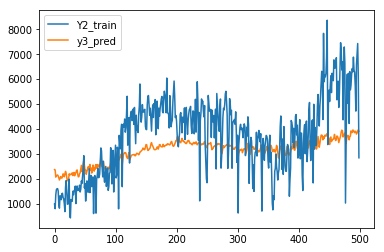

In [172]:
# plot predicted Y (y_pred) and observed Y (Y_train)
plt.plot(Y2_train, zorder=2, label = "Y2_train")
plt.plot(y3_pred , zorder=1, label = "y3_pred")
plt.legend(loc="upper left")
plt.show()
